# This code is to extimate the position of Willapa Bay shorleline before 1860

In [1]:
import sympy as sy
import sympy.geometry as gm

In [2]:
import geopy

In [3]:
import rasterio

In [4]:
from osgeo import gdal

In [5]:
import sys

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import math

In [9]:
from osgeo import gdal

In [47]:
from shapely.geometry import Point, Polygon, LineString, MultiLineString,MultiPoint,MultiPolygon

In [26]:
#create a dictionary, and then save each gdf as a value in the dictionary
gdf_dict = {}
for year in range(1700, 1912):
    gdf_dict[f"shoreline_{year}"] = gpd.read_file(f"../assets/ECY_estimated_shorelines/Aug4/{year}.geojson")


In [27]:

for year in range(1912,1926):
    gdf_dict[f"shoreline_{year}"] = gpd.read_file(f"../assets/ECY_estimated_shorelines/Aug21/{year}.geojson")

## Open the shapefile of the shoreline in 1860

In [7]:
coast_1860=gpd.read_file("../assets/ECY_estimated_shorelines/Aug4/1860.geojson")
coast_1860

,Shape_Leng,layer,geometry
0,0.181588,layer1,"MULTILINESTRING ((-124.11763 46.87711, -124.11..."
1,NaN,layer2,"LINESTRING (-124.11763 46.87711, -124.11250 46..."


In [16]:
#open the shapefile of 1911 shoreline
coast_1911=gpd.read_file("../assets/ECY_estimated_shorelines/Aug4/1911.geojson")

In [13]:
import contextily as ctx

In [21]:
#function to plot the shoreline

def line_show(gdf):
    gdf = gdf.to_crs(epsg=3857)

    # assuming gdf1 and gdf2 are your GeoDataFrames
    fig, ax = plt.subplots(figsize = (10,10))

    coast_1911_3857 = coast_1911.to_crs(epsg=3857)

    # plot the base map of 1911
    base = coast_1911_3857.plot(ax=ax, color='blue', edgecolor='black')

    # plot the first GeoDataFrame

    gdf.plot(ax=base, marker='o', color='black', markersize=5)

    ctx.add_basemap(ax,zoom=11,source=ctx.providers.CartoDB.Positron)

    # Show the plot
    plt.show()

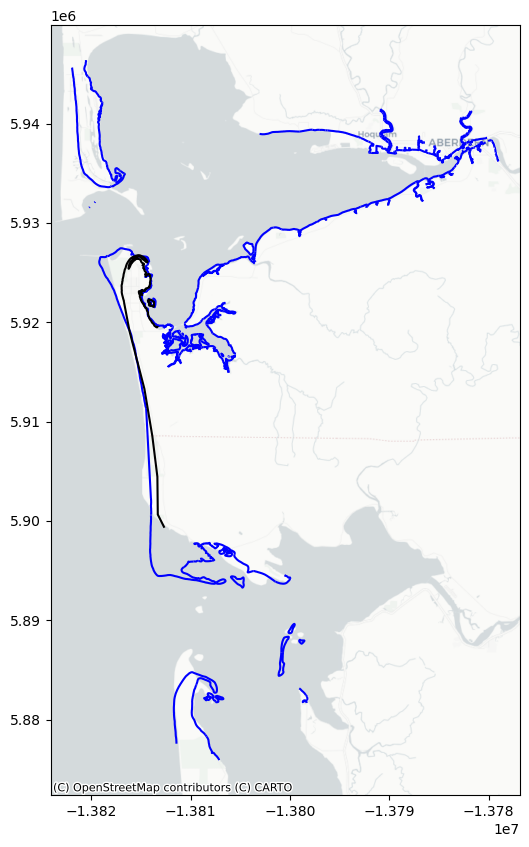

In [22]:
line_show(coast_1860)

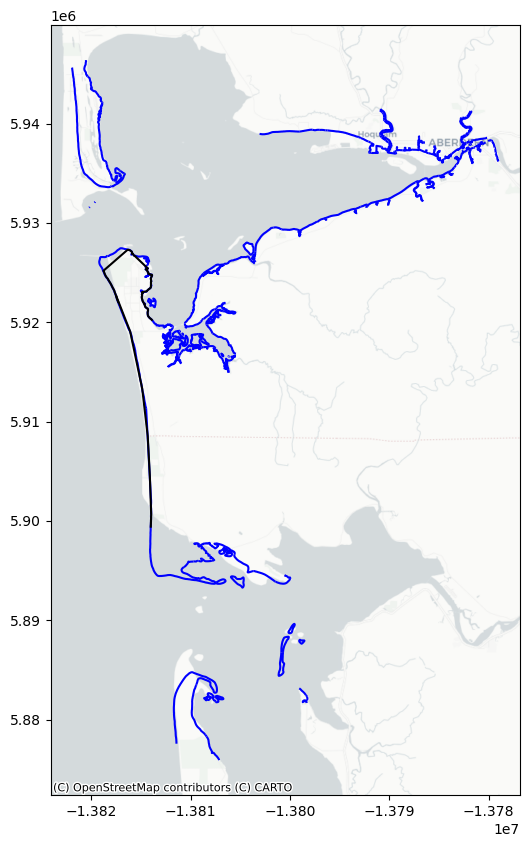

In [38]:
line_show(gdf_dict["shoreline_1910"])

In [39]:
#find the southernmost point of the 1700 shoreline
coast_1700=gdf_dict["shoreline_1700"]
coast_1700


,layer,geometry
0,layer1,"MULTILINESTRING ((-124.11697 46.88119, -124.11..."
1,layer3,"MULTILINESTRING ((-124.11588 46.87739, -124.11..."


In [46]:
#iterate through the points in the 1700 shoreline to find the southernmost point
south_point=None
south_candidate = 90
for multiLingstring in coast_1700.geometry:
    for linestring in multiLingstring.geoms:
        for point in linestring.coords:
            lat_candidate = point[1]
            if lat_candidate < south_candidate:
                south_candidate = lat_candidate
                south_point = point
print(south_point)


(-124.079244, 46.737395)


In [48]:
#function to clip the gdf
def clip(polygon_list,gdf_for_clipping):
    polygon=Polygon(polygon_list)
    gdf_after_clipping = gdf_for_clipping.clip(polygon)
    #poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf_1911.crs)
    return gdf_after_clipping


In [ ]:

    fig, ax = plt.subplots(figsize=(12, 8))
    gdf_1911_clipped.plot(ax=ax, color="purple")
    poly_gdf.boundary.plot(ax=ax, color="black")

In [50]:
#this is the function to keep features that are out of the clipping polygon
def gdf_not_clipped(geometry,polygon_list):
    polygon=Polygon(polygon_list)
    if geometry.intersects(polygon):  # If the geometry intersects the polygon
        return geometry.difference(polygon) # Return the part of the geometry outside the polygon
    elif not polygon.contains(geometry):  # If the geometry is completely outside the polygon
        return geometry
    else:
        return None # Return None if the geometry is completely inside the polygon


In [ ]:
#this step is to get the boundary of the clipping polygon


In [ ]:

gdf_tmp = gdf_dict["shoreline_1911"]['geometry'].apply(gdf_not_clipped,args=(polygon_list,))

gdf_tmp

In [ ]:
polygon=Polygon([(-124.10358, 46.733252766225945),(-124.08, 46.733252766225945),(-124.08,46.712),(-124.0345,46.712),(-124.0345,46.69),(-124.10358,46.69)])
gdf_1911_clipped = gdf_1911.clip(polygon)
poly_gdf = gpd.GeoDataFrame([1], geometry=[polygon], crs=gdf_1911.crs)

fig, ax = plt.subplots(figsize=(12, 8))
gdf_1911_clipped.plot(ax=ax, color="purple")
poly_gdf.boundary.plot(ax=ax, color="black")